# Time Spent Analysis

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data=pd.read_excel("Sample Month End Report for Assesment.xlsx",sheet_name=None)

In [58]:
xls=pd.ExcelFile("Sample Month End Report for Assesment.xlsx")

In [59]:
xls.sheet_names

['Time spent Analysis', 'Key Accounts', 'Meeting Log', 'Inquiry Tracker']

In [60]:
data=pd.read_excel("Sample Month End Report for Assesment.xlsx",sheet_name="Time spent Analysis")
data.head()

,Company,Category,Total Hours,Estimated Cost,3500,inr per hour is cost assumed
0,Chennai,Unknown,32.00,112000,NaN,NaN
1,Pidilite,Distributor,23.75,83125,NaN,NaN
2,Kalpataru Projects,Contractor,23.50,82250,NaN,NaN
3,Asg win,Applicator,15.50,54250,NaN,NaN
4,"Internal/Review (MRM, Hubspot, etc.)",Admin,12.50,43750,NaN,NaN


In [61]:
data.columns.tolist

<bound method IndexOpsMixin.tolist of Index([                     'Company',                    'Category ',
                        'Total Hours',              'Estimated Cost ',
                                 3500, 'inr per hour is cost assumed'],
      dtype='object')>

In [75]:
data=data.rename(columns={"Estimated Cost": "estimated_cost(3500 inr_per_hour)",
                          "Company": "company",
                          "Category ": "category",
                          "Total Hours": "total_hours"
                         })
data

,company,category,total_hours,estimated_cost(3500 inr_per_hour)
0,Chennai,unknown,32.00,112000
1,Pidilite,distributor,23.75,83125
2,Kalpataru Projects,contractor,23.50,82250
3,Asg win,applicator,15.50,54250
4,"Internal/Review (MRM, Hubspot, etc.)",admin,12.50,43750
...,...,...,...,...
137,CNT,consultant/architect,0.50,1750
138,Etecetra architects,consultant/architect,0.50,1750
139,Morceau architects,consultant/architect,0.50,1750
140,Studio tan,consultant/architect,0.50,1750


In [76]:
data.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['company', 'category', 'total_hours',
       'estimated_cost(3500 inr_per_hour)'],
      dtype='object')>

In [78]:
data

,company,category,total_hours,estimated_cost(3500 inr_per_hour)
0,Chennai,unknown,32.00,112000
1,Pidilite,distributor,23.75,83125
2,Kalpataru Projects,contractor,23.50,82250
3,Asg win,applicator,15.50,54250
4,"Internal/Review (MRM, Hubspot, etc.)",admin,12.50,43750
...,...,...,...,...
137,CNT,consultant/architect,0.50,1750
138,Etecetra architects,consultant/architect,0.50,1750
139,Morceau architects,consultant/architect,0.50,1750
140,Studio tan,consultant/architect,0.50,1750


In [79]:
data.columns = data.columns.str.strip()

In [80]:
data

,company,category,total_hours,estimated_cost(3500 inr_per_hour)
0,Chennai,unknown,32.00,112000
1,Pidilite,distributor,23.75,83125
2,Kalpataru Projects,contractor,23.50,82250
3,Asg win,applicator,15.50,54250
4,"Internal/Review (MRM, Hubspot, etc.)",admin,12.50,43750
...,...,...,...,...
137,CNT,consultant/architect,0.50,1750
138,Etecetra architects,consultant/architect,0.50,1750
139,Morceau architects,consultant/architect,0.50,1750
140,Studio tan,consultant/architect,0.50,1750


In [81]:
data.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['company', 'category', 'total_hours',
       'estimated_cost(3500 inr_per_hour)'],
      dtype='object')>

In [82]:
data.isnull().sum()

company                              0
category                             0
total_hours                          0
estimated_cost(3500 inr_per_hour)    0
dtype: int64

# Descriptive Analysis

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   company                            142 non-null    object 
 1   category                           142 non-null    object 
 2   total_hours                        142 non-null    float64
 3   estimated_cost(3500 inr_per_hour)  142 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ KB


In [84]:
data.describe()

,total_hours,estimated_cost(3500 inr_per_hour)
count,142.000000,142.000000
mean,3.464085,12124.295775
std,4.478179,15673.628002
min,0.500000,1750.000000
25%,1.000000,3500.000000
50%,2.000000,7000.000000
75%,3.937500,13781.250000
max,32.000000,112000.000000


In [85]:
data['category'].unique()

array(['unknown', 'distributor', 'contractor', 'applicator', 'admin',
       'developer', 'consultant/architect'], dtype=object)

In [86]:
# In category column for the same category there are two words like 'Admin' and 'admin' So make it one word.
data['category']=data['category'].str.lower().str.strip()

In [125]:
categorywise_totalCost_and_hours=data.groupby('category')[['total_hours','estimated_cost(3500 inr_per_hour)']].sum()
sorted=categorywise_totalCost_and_hours.sort_values(by='estimated_cost(3500 inr_per_hour)',ascending=False)
sorted

,total_hours,estimated_cost(3500 inr_per_hour)
category,,
developer,189.15,662025
consultant/architect,139.50,488250
unknown,54.00,189000
admin,34.50,120750
distributor,26.75,93625
applicator,24.50,85750
contractor,23.50,82250


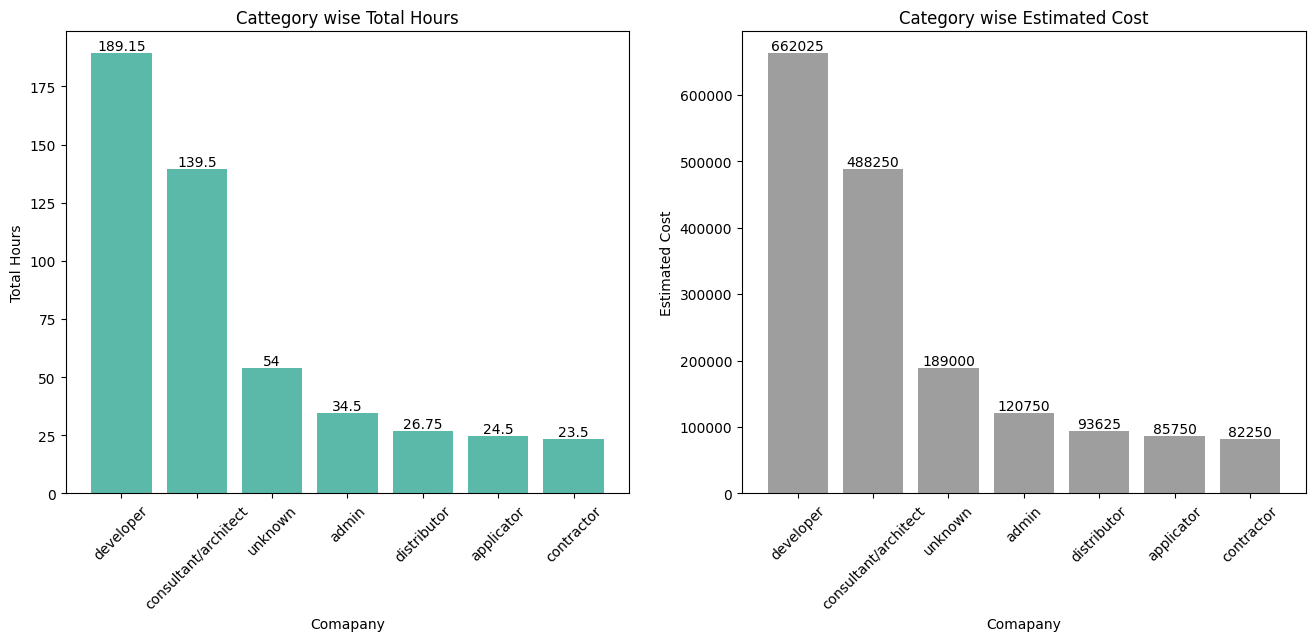

In [129]:
cat_visua=sorted.reset_index()
plt.figure(figsize=(16,6))
#Subplot 1: Total Hours by categories
plt.subplot(1,2,1)
bars=plt.bar(cat_visua['category'],cat_visua['total_hours'],color='#5AB9A8')
plt.xticks(rotation=45)
plt.title("Cattegory wise Total Hours")
plt.bar_label(bars)
plt.xlabel("Comapany")
plt.ylabel("Total Hours")


#Subplot 2: Estimated Cost by categories
plt.subplot(1,2,2)
bars=plt.bar(cat_visua['category'],cat_visua['estimated_cost(3500 inr_per_hour)'],color='#9E9E9E')
plt.xticks(rotation=45)
plt.title("Category wise Estimated Cost")
plt.bar_label(bars)
plt.xlabel("Comapany")
plt.ylabel("Estimated Cost")
plt.show()

In [88]:
company_summary=data.groupby(['company','category'])[['total_hours','estimated_cost(3500 inr_per_hour)']].sum()

In [89]:
company_summary

,,total_hours,estimated_cost(3500 inr_per_hour)
company,category,,
ABB India pvt ltd,developer,5.25,18375
ADM Architects,consultant/architect,2.00,7000
AN Prakash Consultants,consultant/architect,9.50,33250
Abhay Developers,developer,1.00,3500
Ace Group Delhi,unknown,1.25,4375
...,...,...,...
Vikasa Soudha,unknown,1.25,4375
Vishwanath Associates,consultant/architect,0.75,2625
Weekly review meet,admin,2.50,8750


In [90]:
top_10_companies=company_summary.sort_values(by=['estimated_cost(3500 inr_per_hour)','total_hours'], ascending=False
).head(10)
top_10_companies

,,total_hours,estimated_cost(3500 inr_per_hour)
company,category,,
Chennai,unknown,32.00,112000
Pidilite,distributor,23.75,83125
Kalpataru Projects,contractor,23.50,82250
Asg win,applicator,15.50,54250
"Internal/Review (MRM, Hubspot, etc.)",admin,12.50,43750
Birla Groups,developer,12.00,42000
Colliers,developer,11.90,41650
Embassy Developers/Office/Projects,developer,11.50,40250
Design tree,consultant/architect,11.00,38500


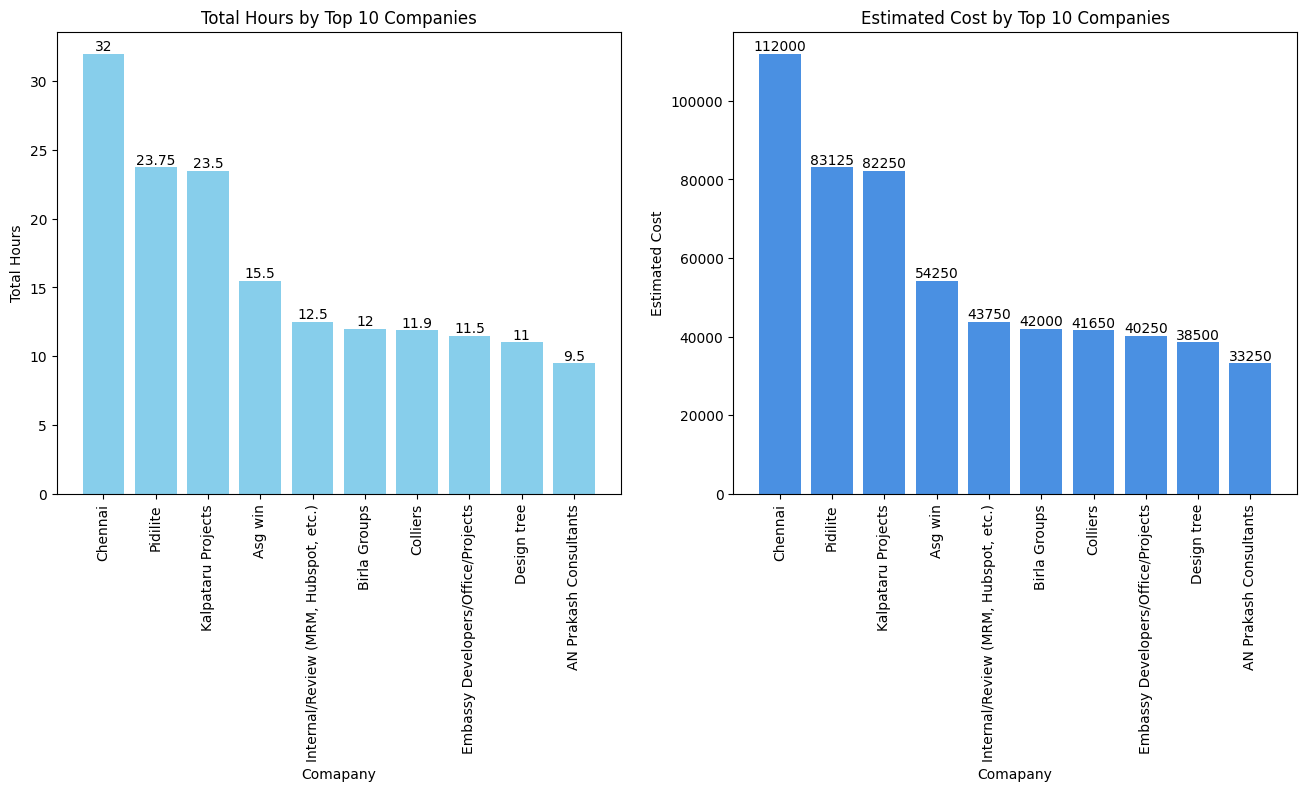

In [139]:
df = top_10_companies.reset_index()

plt.figure(figsize=(16,6))
#Subplot 1: Total Hours by companies
plt.subplot(1,2,1)
bars=plt.bar(df['company'],df['total_hours'],color='skyblue')
plt.xticks(rotation=90)
plt.title("Total Hours by Top 10 Companies")
plt.bar_label(bars)
plt.xlabel("Comapany")
plt.ylabel("Total Hours")



#Subplot 2: Estimated cost by copanies
plt.subplot(1,2,2)
bars=plt.bar(df['company'],df['estimated_cost(3500 inr_per_hour)'],color='#4A90E2')
plt.xticks(rotation=90)
plt.title("Estimated Cost by Top 10 Companies")
plt.bar_label(bars)
plt.xlabel("Comapany")
plt.ylabel("Estimated Cost")
plt.show()

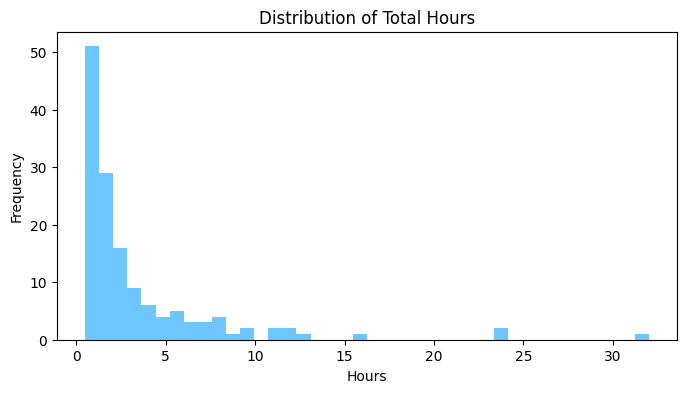

In [142]:
# Histogram of Total Hours
plt.figure(figsize=(8,4))
plt.hist(data['total_hours'], bins=40, color="#6EC6FF")
plt.title("Distribution of Total Hours")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()

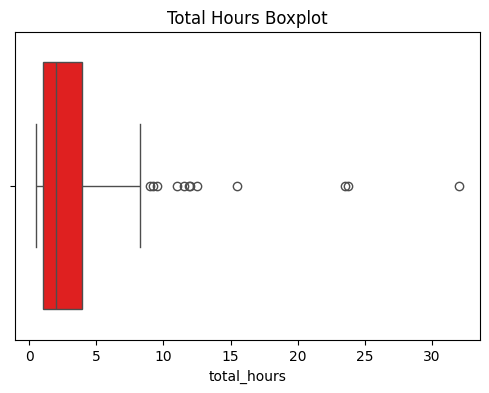

In [146]:
#Boxplot of Total Hours (Outlier Detection)
plt.figure(figsize=(6,4))
sns.boxplot(x=data['total_hours'],color="red")
plt.title("Total Hours Boxplot")
plt.show()

# Conclusions

# Dataset contains 142 entries with companies categorized into 7 types: developer, consultant/architect,unknown, admin, distributor, applicator, and contractor.

# Total Hours: Highly varied, ranging from 0.5 hours to 32 hours
# Averages Hours per comapany: 3.46 hours
# Total Estimated Cost Impact: Based on Rs3500/hr rate,the cost varies from 1750 to 112000

# Category-wise Insights on the basis of highest time and cost contribution 
# Developer>Consultant/Architect>Unknown>Admin
# >Distributor>Applicator>Contractor

# Developer and consultant/architect segments contribute over 1 million INR combined cost
# These two categories create the highest value and should be prioritized for resource allocation, support, and relationship building.

# Focus on developer and architect accounts
# Reduce admin hours (currently 34.5 hours)
# Clean ‘unknown’ category
# Prioritize top-performing clients
# Improve time distribution